In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
import pandas as pd 
import datetime

%matplotlib inline
plt.style.use('fivethirtyeight')

import keras
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [4]:
from datetime import datetime

In [165]:
from binance.client import Client

client= Client('username', 
               'pw')



In [ ]:
#testnet
from binance.client import Client

client= Client('username', 
               'pw')


In [10]:
candles= client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)

In [11]:
len(candles)

500

In [12]:
candles[499]

[1614533220000,
 '43683.90000000',
 '43727.35000000',
 '43677.47000000',
 '43700.91000000',
 '12.11469700',
 1614533279999,
 '529435.58571837',
 458,
 '6.62784500',
 '289633.12318773',
 '0']

In [106]:
price= np.array([float(candles[i][4]) for i in range(500)])
# price

In [17]:
time= np.array([int(candles[i][0]) for i in range(500)])
#convert time to hrs min secs
t= np.array([datetime.fromtimestamp(time[i]/1000).strftime('%H:%M:%S') for i in range(500)])

In [18]:
price.shape

(500,)

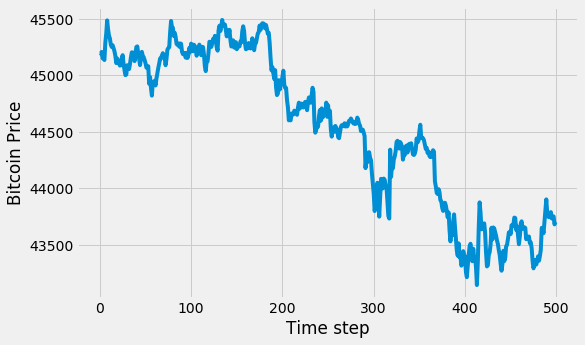

In [19]:
plt.figure(figsize=(8,5))
plt.xlabel('Time step')
plt.ylabel('Bitcoin Price')
plt.plot(price)

In [20]:
timeframe= pd.DataFrame({'Time':t, 'Price BTC':price})

In [21]:
timeframe

,Time,Price BTC
0,09:08:00,45195.28
1,09:09:00,45191.65
2,09:10:00,45205.94
3,09:11:00,45149.99
4,09:12:00,45146.35
...,...,...
495,17:23:00,43733.22
496,17:24:00,43745.10
497,17:25:00,43751.57
498,17:26:00,43681.04


In [24]:
#reshape data
price=price.reshape(500,1)
price

array([[45195.28],
       [45191.65],
       [45205.94],
       [45149.99],
       [45146.35],
       [45134.45],
       [45287.18],
       [45368.62],
       [45484.82],
       [45404.03],
       [45350.83],
       [45324.99],
       [45270.63],
       [45250.11],
       [45264.9 ],
       [45240.  ],
       [45211.59],
       [45170.73],
       [45107.22],
       [45147.5 ],
       [45128.4 ],
       [45103.2 ],
       [45085.13],
       [45087.72],
       [45151.79],
       [45177.52],
       [45097.73],
       [45045.14],
       [45000.33],
       [45006.57],
       [45088.6 ],
       [45075.9 ],
       [45054.08],
       [45100.01],
       [45156.08],
       [45202.47],
       [45187.26],
       [45200.  ],
       [45124.87],
       [45186.25],
       [45249.22],
       [45254.93],
       [45193.36],
       [45145.46],
       [45089.41],
       [45147.28],
       [45206.47],
       [45171.62],
       [45159.59],
       [45135.03],
       [45106.1 ],
       [45067.61],
       [4506

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [26]:
scaler.fit(price[:374])


StandardScaler()

In [27]:
price=scaler.transform(price)

In [28]:
df=pd.DataFrame(price.reshape(100,5), columns=['First', 
                                               'Second', 
                                               'Third', 
                                               'Fourth',
                                              'Target'])

In [30]:
#1st minute, 2nd..... predicting the 5th minute(target)
df.head()

,First,Second,Third,Fourth,Target
0,0.774300,0.766080,0.798441,0.671737,0.663493
1,0.636545,0.982417,1.166847,1.429993,1.247036
2,1.126559,1.068042,0.944938,0.898469,0.931962
3,0.875573,0.811236,0.718704,0.574880,0.666098
4,0.622844,0.565776,0.524854,0.530720,0.675813


In [31]:
x_train=df.iloc[:74,:4]
y_train=df.iloc[:74,-1]

x_test=df.iloc[75:99,:4]
y_test=df.iloc[75:99,-1]

In [32]:
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
x_test=np.array(x_test)

In [34]:
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [36]:
x_train.shape, x_test.shape

((74, 4, 1), (24, 4, 1))

In [48]:
import tensorflow as tf

model= tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, return_sequences=True, input_shape=(4,1)),
    tf.keras.layers.LSTM(40, return_sequences=False),
    tf.keras.layers.Dense(1, activation='linear')
])


model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4, 20)             1760      
_________________________________________________________________
lstm_3 (LSTM)                (None, 40)                9760      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 11,561
Trainable params: 11,561
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(x_train, y_train, batch_size=5,epochs=100)

Epoch 1/100
15/15 [==============================] - 4s 4ms/step - loss: 0.9700
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5079
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1071
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0363
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0416
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0467
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0375
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0392
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0530
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0246
Epoch 11/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0579
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0372
Epoch 13/100
15/15 [=================

In [50]:
y_pred=model.predict(x_test)

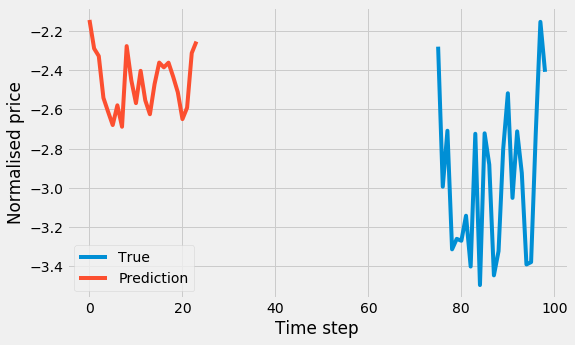

In [51]:
plt.figure(figsize=(8,5))
plt.xlabel('Time step')
plt.ylabel('Normalised price')
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Prediction')
plt.legend()

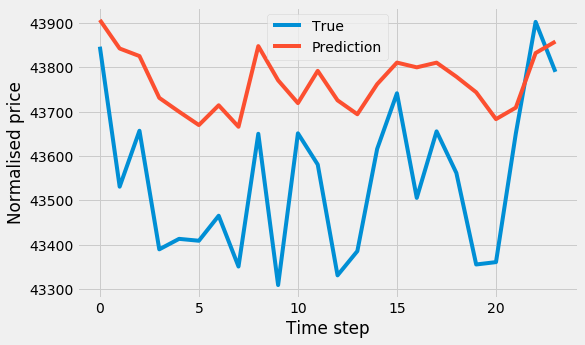

In [52]:
plt.figure(figsize=(8,5))
plt.xlabel('Time step')
plt.ylabel('Normalised price')
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(y_pred), label='Prediction')
plt.legend()

In [56]:
from sklearn.metrics import mean_squared_error

testscore=np.sqrt(mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred)))
print('Test Score RMSE: ', testscore)

Test Score RMSE:  254.66954326555214


In [60]:
model.save('btc_1min_model.h5')

In [62]:
# from keras.models import load_model

# #load model
# model=load_model('btc_1min_model.h5')

# model.summary

# TradingBot

In [126]:
check=client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1MINUTE)
check[499]

[1614540120000,
 '43690.31000000',
 '43702.99000000',
 '43612.72000000',
 '43629.71000000',
 '15.74919600',
 1614540179999,
 '687824.86387603',
 321,
 '4.28287200',
 '187052.44226875',
 '0']

In [134]:
index=[496, 497, 498, 499]

candle=np.array([float(check[i][4]) for i in index]).reshape(1,-1)

model_feed=candle.reshape(1,4,1)

model_feed

array([[[43608.89],
        [43691.34],
        [43690.32],
        [43629.71]]])

In [128]:
scaler.inverse_transform(model.predict(model_feed)[0])[0]

45408.16

In [100]:
# index=[496, 497, 498, 499]

# candles=scaler.transform(np.array([float(check[i][4]) for i in index]).reshape(1,-1))


# model_feed= candles.reshape(1,4,1)

# scaler.inverse_transform(model.predict(model_feed)[0])[0]

In [136]:
float(scaler.inverse_transform(model.predict(model_feed)[0])[0])

45408.16015625

In [139]:
symbol='BTCUSDT'
quantity='0.05'

order=False
index=[496, 497, 498, 499]

while True:
    price= client.get_recent_trades(symbol=symbol)
    candle=client.get_klines(symbol=symbol, interval=Client.KLINE_INTERVAL_1MINUTE)
    
    candle=np.array([float(check[i][4]) for i in index]).reshape(1,-1)
    model_feed=candle.reshape(1,4,1)
#     model_feed=scaler.inverse_transform(model.predict(model_feed)[0])[0]
    
    
    if order == False and float(price[len(price)-1]['price'])< float(scaler.inverse_transform(model.predict(model_feed)[0])[0]):
        
        order=True
        buy_price= client.get_order_book(symbol=symbol)['asks'][0][0]
        print('Buy Market price:', float(buy_price), 'Timestamp:', str(datetime.now()))
        
    elif order == True and float(price[len(price)-1]['price'])-float(buy_price) >=10:
        
        
        order=False
        sell_price=client.get_order_book(symbol=symbol)['bids'][0][0]

        print('Sell Market Price :', float(sell_price), 'Timestamp:', str(datetime.now()))
        

Buy Market price: 43512.28 Timestamp: 2021-02-28 19:29:33.691307
Sell Market Price : 43518.5 Timestamp: 2021-02-28 19:29:38.227566
Buy Market price: 43518.45 Timestamp: 2021-02-28 19:29:39.024612
Sell Market Price : 43530.35 Timestamp: 2021-02-28 19:30:16.218739
Buy Market price: 43537.36 Timestamp: 2021-02-28 19:30:17.007784
Sell Market Price : 43549.99 Timestamp: 2021-02-28 19:30:31.068588
Buy Market price: 43559.78 Timestamp: 2021-02-28 19:30:32.082646
Sell Market Price : 43561.33 Timestamp: 2021-02-28 19:30:45.476412
Buy Market price: 43555.89 Timestamp: 2021-02-28 19:30:46.294459
Sell Market Price : 43581.22 Timestamp: 2021-02-28 19:30:52.644822
Buy Market price: 43588.98 Timestamp: 2021-02-28 19:30:53.456869
Sell Market Price : 43597.68 Timestamp: 2021-02-28 19:30:58.176139
Buy Market price: 43602.94 Timestamp: 2021-02-28 19:30:58.970184
Sell Market Price : 43618.4 Timestamp: 2021-02-28 19:31:03.891466
Buy Market price: 43621.34 Timestamp: 2021-02-28 19:31:04.688511
Sell Market P

Sell Market Price : 44504.1 Timestamp: 2021-02-28 20:01:04.783433
Buy Market price: 44524.89 Timestamp: 2021-02-28 20:01:05.594479
Sell Market Price : 44525.63 Timestamp: 2021-02-28 20:01:06.325521
Buy Market price: 44515.27 Timestamp: 2021-02-28 20:01:07.128567
Sell Market Price : 44526.17 Timestamp: 2021-02-28 20:56:20.434465
Buy Market price: 44534.36 Timestamp: 2021-02-28 20:56:21.210510
Sell Market Price : 44566.26 Timestamp: 2021-02-28 20:56:23.880662
Buy Market price: 44569.23 Timestamp: 2021-02-28 20:56:24.659707
Sell Market Price : 44573.99 Timestamp: 2021-02-28 20:56:25.870776
Buy Market price: 44593.16 Timestamp: 2021-02-28 20:56:26.639820
Sell Market Price : 44629.76 Timestamp: 2021-02-28 20:56:39.292544
Buy Market price: 44648.82 Timestamp: 2021-02-28 20:56:40.497613
Sell Market Price : 44650.36 Timestamp: 2021-02-28 20:56:42.616734
Buy Market price: 44684.1 Timestamp: 2021-02-28 20:56:43.614791
Sell Market Price : 44717.09 Timestamp: 2021-02-28 20:56:55.855491
Buy Market 

KeyboardInterrupt: 

In [145]:
buy_price= client.get_order_book(symbol=symbol)['asks'][0][0]
buy_price

'45307.00000000'